In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12


Hodrick Prescott Filter

The Hodrick Prescott filter is used to separate the trend and cyclical component from the time series data.

In [ ]:
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
usmacro = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/시계열 스터디/2주차/macrodata.csv', index_col=0,parse_dates=True)

In [ ]:
usmacro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
usmacro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        203 non-null    int64  
 1   quarter     203 non-null    int64  
 2   realgdp     203 non-null    float64
 3   realcons    203 non-null    float64
 4   realinv     203 non-null    float64
 5   realgovt    203 non-null    float64
 6   realdpi     203 non-null    float64
 7   cpi         203 non-null    float64
 8   m1          203 non-null    float64
 9   tbilrate    203 non-null    float64
 10  unemp       203 non-null    float64
 11  pop         203 non-null    float64
 12  infl        203 non-null    float64
 13  realint     203 non-null    float64
 14  gdp_trend   203 non-null    float64
 15  gdp_cycles  203 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 27.0 KB


In [ ]:
usmacro.index.dtype

dtype('<M8[ns]')

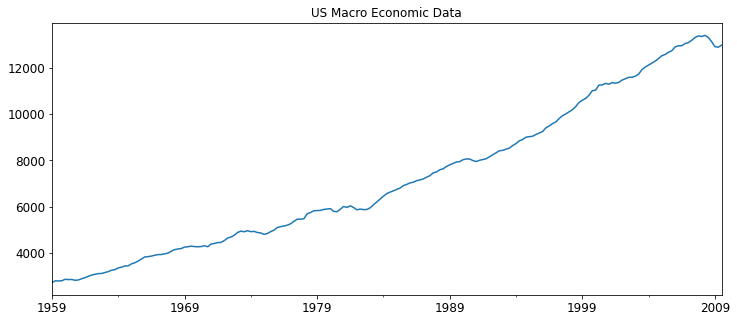

In [ ]:
# visualize the realgdp --- > will use the capabilities of pandas plotting capability
usmacro['realgdp'].plot(figsize = (12, 5), title = 'US Macro Economic Data').autoscale(axis = 'x', tight = True)

In [ ]:
cycles,trend = hpfilter(usmacro['realgdp'],lamb=1600) #튜플 언패킹으로 cycle과 trend 뽑아낼 수 있다.

In [ ]:
usmacro['gdp_trend'] = trend
usmacro['gdp_cycles'] = cycles

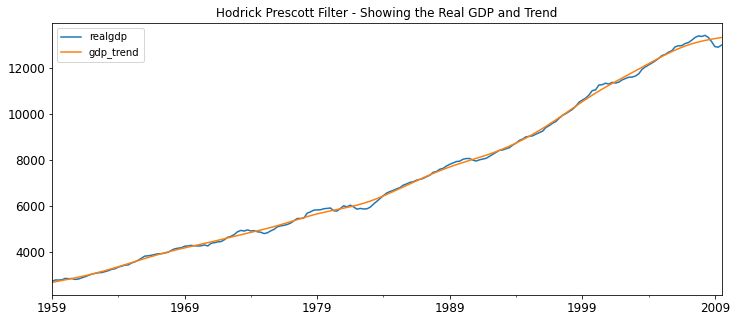

In [ ]:
usmacro[['realgdp','gdp_trend']].plot(figsize=(12,5),title='Hodrick Prescott Filter - Showing the Real GDP and Trend').autoscale(axis='x',tight=True)

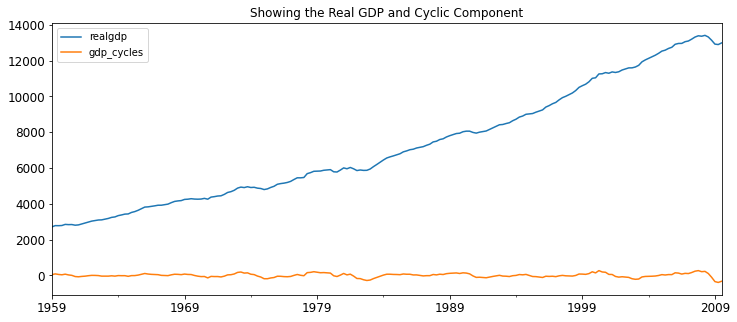

In [ ]:
usmacro[['realgdp','gdp_cycles']].plot(figsize=(12,5),title='Showing the Real GDP and Cyclic Component').autoscale(axis='x',tight=True)

인덱스로 특정 날짜 이후 확인 가능

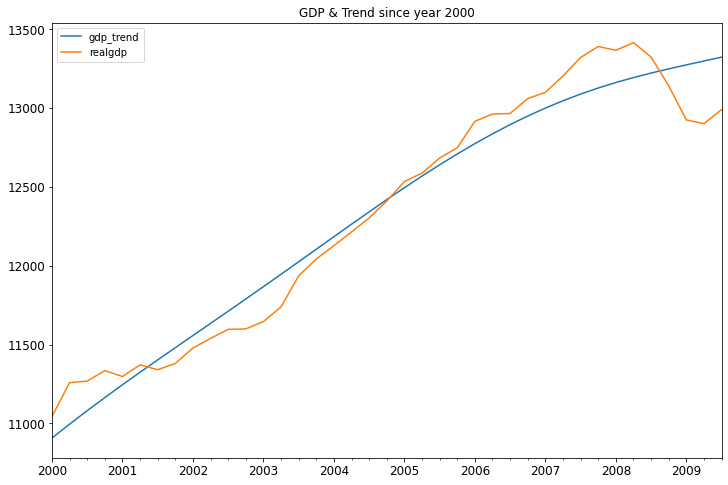

In [ ]:
usmacro[['gdp_trend','realgdp']]['2000-03-31':].plot(figsize=(12,8),title='GDP & Trend since year 2000').autoscale(axis='x',tight=True);

ETS - Error, Trend and Seasonality Decomposition

In [ ]:
airline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/시계열 스터디/2주차/AirPassengers.csv',index_col='Month', parse_dates=True)

In [ ]:
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
decompose_result = seasonal_decompose(airline['#Passengers'], model = 'multiplicative')

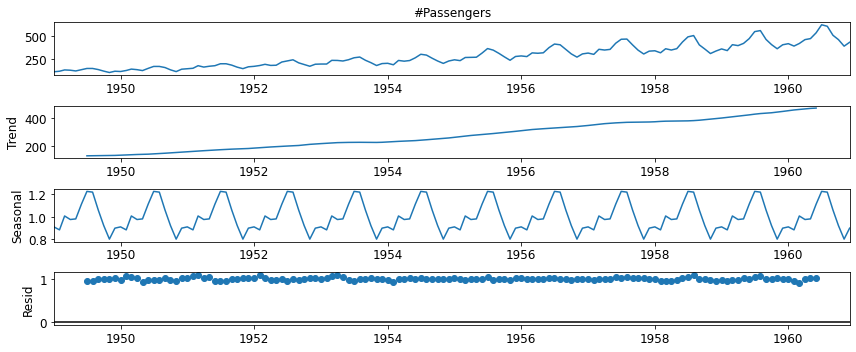

In [ ]:
decompose_result.plot();

Simple Moving Averages

In [ ]:
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airline.dropna(inplace=True)

rolling 평균으로 MA 만들기

In [ ]:
airline['6-month-SMA'] = airline['#Passengers'].rolling(window=6).mean()

In [ ]:
airline['12-month-SMA'] = airline['#Passengers'].rolling(window=12).mean()


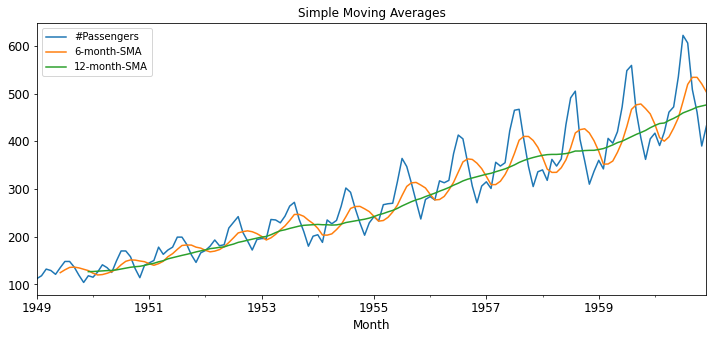

In [ ]:
airline.plot(title='Simple Moving Averages');


In [ ]:
airline.head(13) #window size 6을 만족하지 못하는 초기 데이터는 NA값이 된다.

,#Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


EWMA

In [ ]:
airline['ewma12'] = airline['#Passengers'].ewm(span=12, adjust = False).mean()

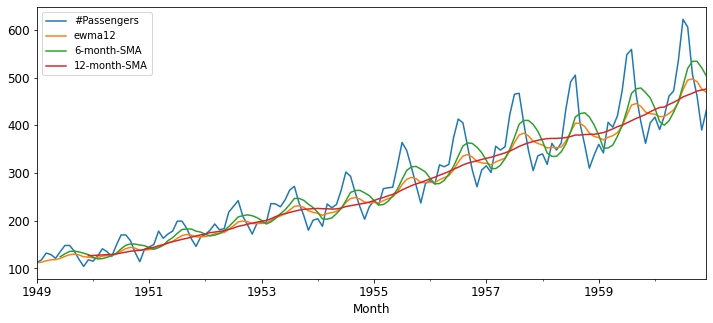

In [ ]:
airline[['#Passengers','ewma12','6-month-SMA','12-month-SMA']].plot();

Smoothing 효과를 비교해보자
- 6 MA
- ewma
- 12 MA

순으로 smoothing 효과가 크다



In [ ]:
span = 12
alpha = 2/(span+1)

In [ ]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

frequency = None으로 되어있는걸 확인할 수 있다.

Holt winters나 아리마 사리마 등의 모델에 넣기 위해서는 freq 설정을 해줘야한다.

In [ ]:
airline.index.freq = 'MS' 


In [ ]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Frequency 변경 확인

In [ ]:
airline['SES12']=SimpleExpSmoothing(airline['#Passengers']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)

마지막에 fit된 value를 한시점 당김으로서 예측이 아니라 Smoothing의 효과로 바꿔준다.

In [ ]:
airline.head()


,#Passengers,6-month-SMA,12-month-SMA,ewma12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


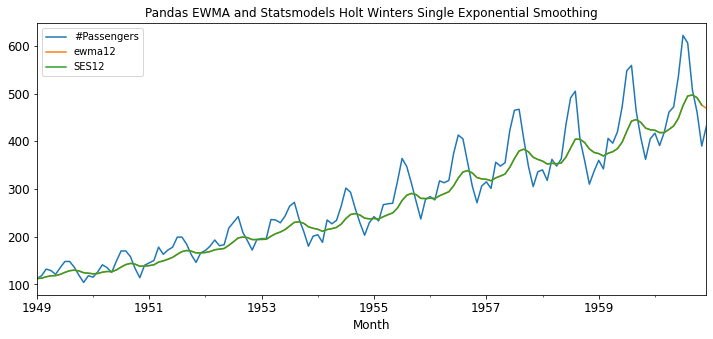

In [ ]:
airline[['#Passengers','ewma12','SES12']].plot(title='Pandas EWMA and Statsmodels Holt Winters Single Exponential Smoothing');

EWMA와 HOLT 값이 정확히 일치해서 가려진다.

Double Exponential Smoothing (holt add방식)

In [ ]:
airline['DES12'] = ExponentialSmoothing(airline['#Passengers'],trend='add').fit().fittedvalues.shift(-1)

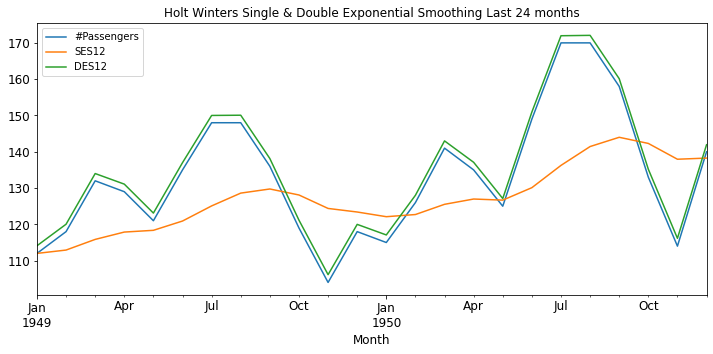

In [ ]:
airline[['#Passengers','SES12','DES12']].iloc[:24].plot(title='Holt Winters Single & Double Exponential Smoothing Last 24 months').autoscale(axis='x',tight=True);

holt mul 방식

In [ ]:
airline['DES12_mul'] = ExponentialSmoothing(airline['#Passengers'],trend='mul').fit().fittedvalues.shift(-1)

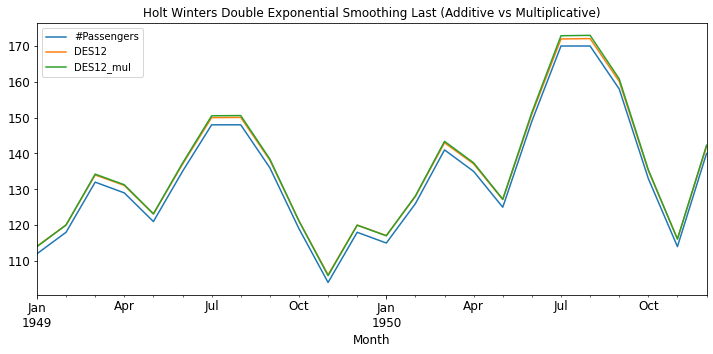

In [ ]:
airline[['#Passengers','DES12','DES12_mul']].iloc[:24].plot(title='Holt Winters Double Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

원래 코드 제공 파일에서는 Multiplicative가 좋게 나오는데 여기서는 add가 더 좋게나옴 

3중 지수 평활
add, add와
mul mul 비교

In [ ]:
airline['TESadd12'] = ExponentialSmoothing(airline['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [ ]:
airline['TESmul12'] = ExponentialSmoothing(airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


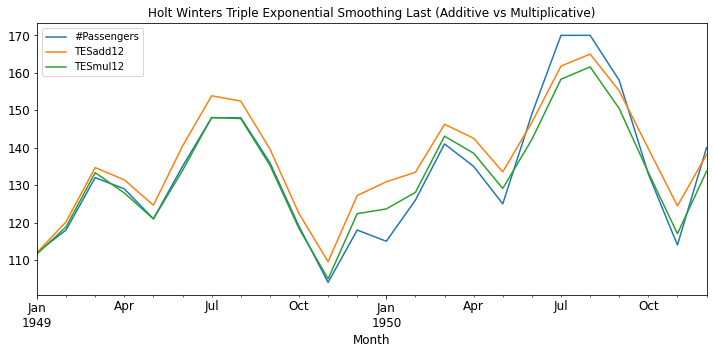

In [ ]:
airline[['#Passengers','TESadd12','TESmul12']].iloc[:24].plot(title='Holt Winters Triple Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

mul 방식이 더 낫다

홀트윈터스로 예측하기

In [ ]:
airline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/시계열 스터디/2주차/AirPassengers.csv',index_col='Month', parse_dates=True)

In [ ]:
airline.tail()#끝단

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
len(airline)

144

In [ ]:
train_airline = airline[:108] 
test_airline = airline[108:] 

In [ ]:
len(test_airline)


36

In [ ]:
fitted_model = ExponentialSmoothing(train_airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')
test_predictions[:10]

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


1958-01-01    356.968658
1958-02-01    344.588831
1958-03-01    405.718358
1958-04-01    400.610839
1958-05-01    409.001684
1958-06-01    480.694276
1958-07-01    530.470211
1958-08-01    523.288770
1958-09-01    454.210800
1958-10-01    392.518290
Freq: MS, Name: HW Test Forecast, dtype: float64

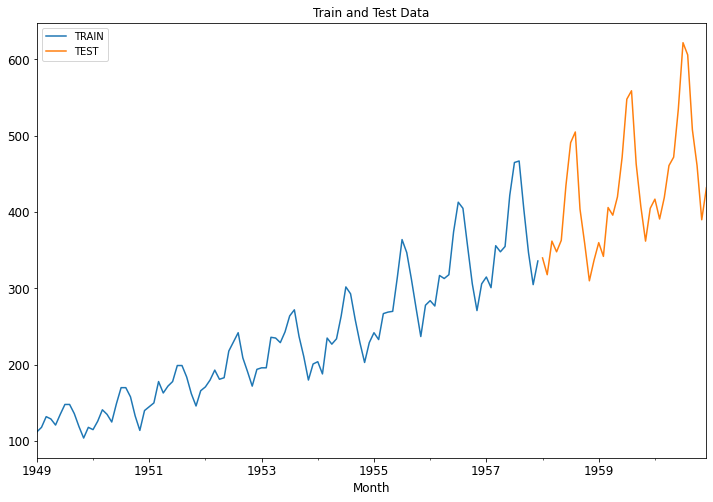

In [ ]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

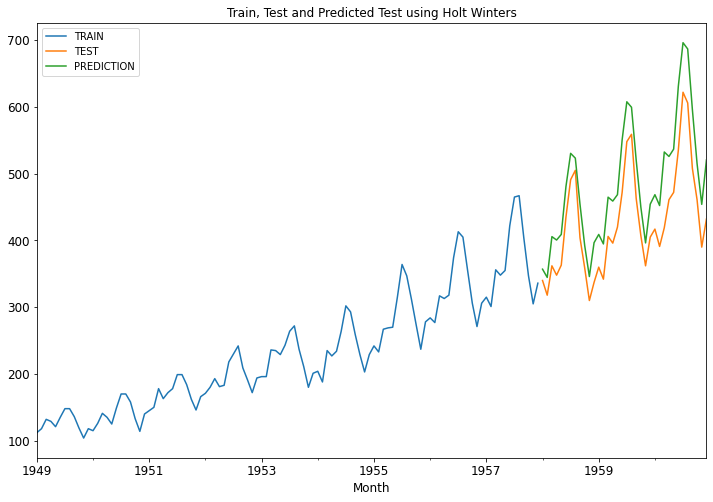

In [ ]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

변수 하나에 limitation을 걸어도 plt결과는 전체에 lim을 걸어준다. 

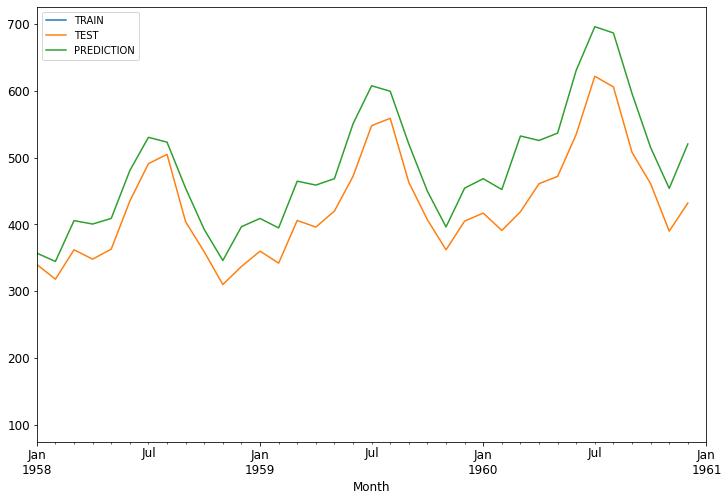

In [ ]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print(f'Mean Squared Error = {mean_squared_error(test_airline,test_predictions)}')

Mean Squared Error = 3525.9322806129094


In [ ]:
test_airline.describe()

,#Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


이번엔 전체 데이터 다 놓고 리얼 예측

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


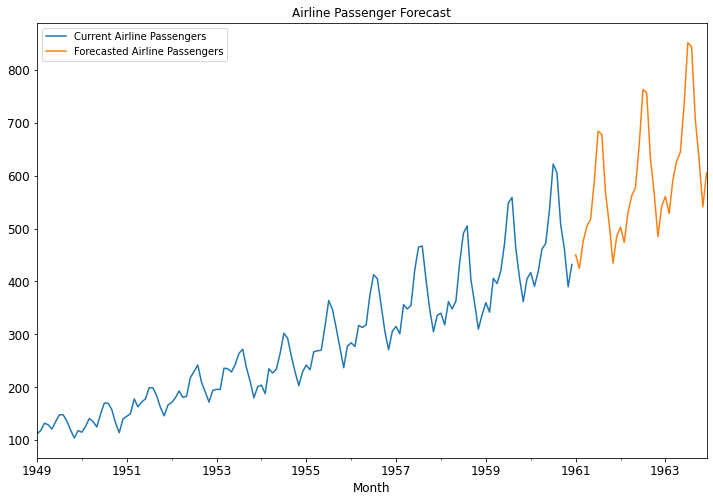

In [ ]:
final_model = ExponentialSmoothing(airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(steps=36)
airline['#Passengers'].plot(figsize=(12,8),legend=True,label='Current Airline Passengers')
forecast_predictions.plot(legend=True,label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast');